In [1]:
pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymysql

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 405.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
db = pymysql.connect(
    host="10.64.66.27",
    port=9030,
    user='root',    #在这里输入用户名
    password='Volvo2022',     #在这里输入密码
    )

cursor = db.cursor()

In [6]:
cursor.execute(f'SELECT sending_time,accumulated_mileage,battery_pack_temperature,vehicle_state,soc,total_current,total_voltage FROM rms_db.rms_all_120_codev where vin="LYVXEEDE3NL671041"' )
df_671041=pd.DataFrame(cursor.fetchall())

In [14]:
vin_list = vin_list[0].unique()

In [12]:
cursor.close()

In [13]:
db.close()

In [16]:
len(vin_list)

127

In [77]:
df_671041_sorted  = df_671041.sort_values(by=0)

In [68]:
df_sorted = df_448647.sort_values(by=0)

In [81]:
df_671041_sorted[1].min()

0.0

In [69]:
df_sorted[0].min(),df_sorted[0].max(),

(Timestamp('2021-10-28 12:13:15'), Timestamp('2023-02-16 17:50:27'))

In [83]:
temp_42 = df_671041_sorted[2].to_list()

In [11]:
temperature_47 = df_sorted[2].to_list()

In [12]:
def calave_(extract):
    x = []
    for row in extract:
        datalst1 = row.split(',')
        datalst2 = []
        for obj in datalst1:
            datalst2.append(obj.split(':'))
        datalst3 = datalst2[2:-1]
        res = []
        ans = []
        ave = 0
        res.append(datalst3[0][2])
        for obj in datalst3:
            if len(obj) <= 2:
                res.append(obj[1])
        for obj in res:
            match = re.search(r'\d+\.?\d*', obj)
            if match:
                number = float(match.group())
                ans.append(number)
        for num in ans:
            ave += num
        ave = ave/len(res)
        x.append(ave)
    return x

In [13]:
import re

In [85]:
df_671041_sorted[2] = calave_(temp_42)

In [14]:
df_sorted[2] = calave_(temperature_47)

In [88]:
df_671041_sorted = df_671041_sorted.rename(columns={0:'send_time',1:'total_milage',2:'temp_avg',3:'vehicle_state',4:'SOC(%)',5:'total_current',6:'total_voltage'})

In [15]:
df_sorted = df_sorted.rename(columns={0:'send_time',1:'total_milage',2:'temp_avg',3:'vehicle_state',4:'SOC(%)',5:'total_current',6:'total_voltage'})

In [16]:
df_sorted['vehicle_state'].value_counts()

Vehicle start state    128821
Flameout               101238
Name: vehicle_state, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Histogram(x=df_sorted['temp_avg'], nbinsx=42)])
fig.update_layout(
    title_text='Histogram of battery pack temperature',
    xaxis_title_text='battery pack temperature',
    yaxis_title_text='count',
    bargap=0.2,  # Gap between bars of adjacent location coordinates
    bargroupgap=0.1  # Gap between bars of the same location coordinates
)
fig.show()

In [18]:
df_sorted['time_diff'] = df_sorted['send_time'].diff()
df_sorted['time_diff'].describe()

count                       230058
mean     0 days 00:05:30.888280346
std      0 days 06:10:17.482624744
min                0 days 00:00:00
25%                0 days 00:00:10
50%                0 days 00:00:10
75%                0 days 00:00:10
max               76 days 22:45:20
Name: time_diff, dtype: object

In [89]:
df_671041_sorted['time_diff'] = df_671041_sorted['send_time'].diff()
df_671041_sorted['time_diff'].describe()

count                       312766
mean     0 days 00:02:11.557240876
std      0 days 04:03:01.421942151
min                0 days 00:00:00
25%                0 days 00:00:01
50%                0 days 00:00:01
75%                0 days 00:00:30
max               77 days 19:55:47
Name: time_diff, dtype: object

In [19]:
df_sorted['time_diff'] = df_sorted['time_diff'].dt.total_seconds()

In [90]:
df_671041_sorted['time_diff'] = df_671041_sorted['time_diff'].dt.total_seconds()

In [20]:
df_sorted['time_diff'].describe()

count    2.300580e+05
mean     3.308883e+02
std      2.221748e+04
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      6.648320e+06
Name: time_diff, dtype: float64

In [91]:
df_671041_sorted['time_diff'].describe()

count    3.127660e+05
mean     1.315572e+02
std      1.458142e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+01
max      6.724547e+06
Name: time_diff, dtype: float64

In [21]:
df_sorted['driving_time']=0
df_sorted['parking_time']=0

In [93]:
df_671041_sorted['driving_time']=0
df_671041_sorted['parking_time']=0

In [94]:
df_671041_sorted.loc[df_671041_sorted['time_diff'] > 60, 'parking_time'] = df_671041_sorted['time_diff'] #when time difference > threshold, consider as parking
df_671041_sorted.loc[df_671041_sorted['time_diff'] <=60, 'driving_time'] = df_671041_sorted['time_diff'] #when time difference < threshold, consider as driving

In [ ]:
df_sorted.loc[df_sorted['time_diff'] > 60, 'parking_time'] = df_sorted['time_diff'] #when time difference > threshold, consider as parking
df_sorted.loc[df_sorted['time_diff'] <=60, 'driving_time'] = df_sorted['time_diff'] #when time difference < threshold, consider as driving

In [23]:
df_sorted['temp_avg'] = df_sorted['temp_avg'].astype(int)

In [95]:
df_671041_sorted['temp_avg'] = df_671041_sorted['temp_avg'].astype(int)

In [96]:
time_per_temperature_671041 = df_671041_sorted.groupby('temp_avg')['driving_time'].sum()
time_per_temperature_671041

temp_avg
0       2460.0
1       3273.0
2       3060.0
3       8519.0
4       8310.0
5       6840.0
6       9470.0
7      15488.0
8      13447.0
9      21488.0
10     21278.0
11     27119.0
12     26916.0
13     31402.0
14     38800.0
15     46002.0
16     77507.0
17     74558.0
18     87656.0
19     88525.0
20    108919.0
21    148002.0
22    229641.0
23    306608.0
24    408224.0
25    250274.0
26    163696.0
27    163942.0
28    136364.0
29    139471.0
30    130662.0
31    177399.0
32    178011.0
33    116622.0
34     19730.0
35      6385.0
36      5110.0
37      2315.0
38      1770.0
Name: driving_time, dtype: float64

In [24]:
sum_time_diff_per_temperature = df_sorted.groupby('temp_avg')['driving_time'].sum()
sum_time_diff_per_temperature

temp_avg
0       4772.0
1       3248.0
2       2291.0
3       6920.0
4       7495.0
5       9063.0
6      10644.0
7      23379.0
8      41398.0
9      37147.0
10     63565.0
11     44280.0
12     42608.0
13     50693.0
14     56938.0
15     35461.0
16     57457.0
17     54749.0
18     46544.0
19     87007.0
20    124786.0
21    125224.0
22    100941.0
23    100521.0
24     94021.0
25    124027.0
26    123342.0
27     85251.0
28    110502.0
29     75113.0
30     99217.0
31    130660.0
32    115988.0
33     86103.0
34     17522.0
35      1530.0
36       910.0
37       670.0
38       300.0
39       300.0
40       420.0
41       500.0
Name: driving_time, dtype: float64

In [25]:
sum_time_hour = sum_time_diff_per_temperature/3600

In [97]:
hour_671041_temp = time_per_temperature_671041/3600

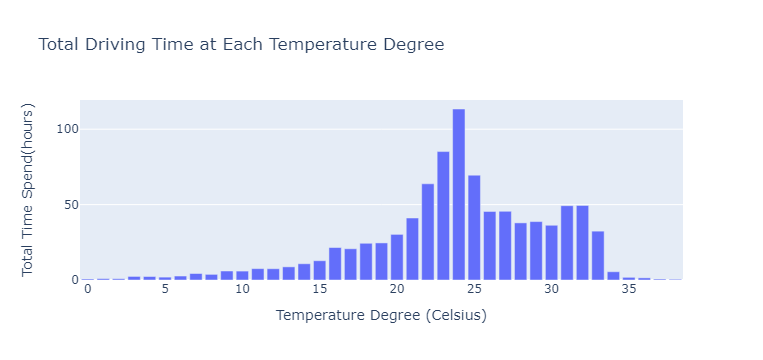

In [98]:
fig = go.Figure(data=[go.Bar(x=hour_671041_temp.index, y=hour_671041_temp.values)])

# Customize the plot layout
fig.update_layout(title='Total Driving Time at Each Temperature Degree',
                  xaxis_title='Temperature Degree (Celsius)',
                  yaxis_title='Total Time Spend(hours)')

# Show the plot
fig.show()

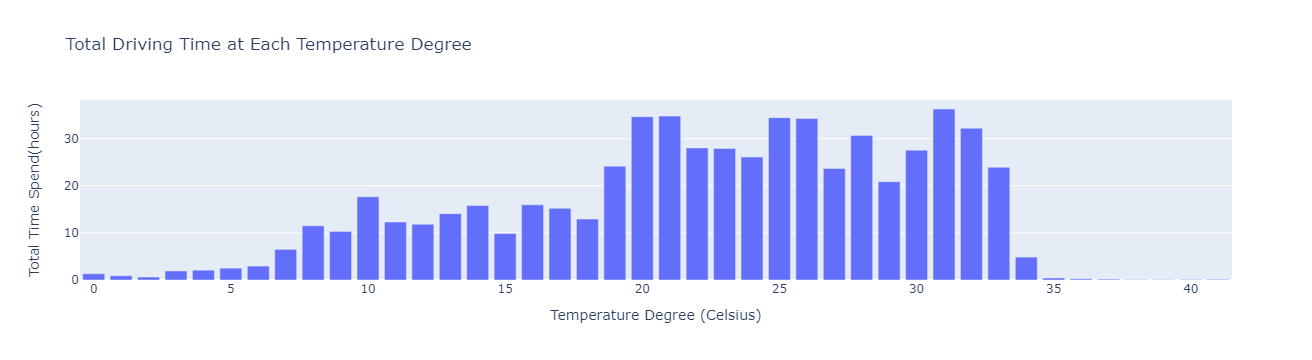

In [26]:
fig = go.Figure(data=[go.Bar(x=sum_time_diff_per_temperature.index, y=sum_time_hour.values)])

# Customize the plot layout
fig.update_layout(title='Total Driving Time at Each Temperature Degree',
                  xaxis_title='Temperature Degree (Celsius)',
                  yaxis_title='Total Time Spend(hours)')

# Show the plot
fig.show()

In [99]:
bins = list(range(0, 45, 5))
labels = [f"{x}-{x+4}" for x in bins[:-1]]  # Create labels for the pie chart

In [100]:
import plotly.express as px

In [101]:
df_671041_sorted

,send_time,total_milage,temp_avg,vehicle_state,SOC(%),total_current,total_voltage,time_diff,parking_time,driving_time
166144,2021-10-28 12:13:15,0.0,23,Flameout,27,1.2,388.8,NaN,0.0,0.0
166145,2021-10-28 12:16:38,0.0,23,Flameout,27,1.1,388.8,203.0,203.0,0.0
166146,2021-10-28 12:19:09,0.0,23,Vehicle start state,27,7.2,388.3,151.0,151.0,0.0
166147,2021-10-28 12:19:39,0.0,23,Vehicle start state,27,4.0,388.5,30.0,0.0,30.0
166148,2021-10-28 12:20:09,0.0,23,Vehicle start state,27,4.1,388.3,30.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...
236404,2023-02-16 17:50:23,19952.0,23,Vehicle start state,54,4.3,403.8,1.0,0.0,1.0
236405,2023-02-16 17:50:24,19952.0,23,Vehicle start state,54,4.5,403.8,1.0,0.0,1.0
236406,2023-02-16 17:50:25,19952.0,23,Vehicle start state,54,3.6,403.9,1.0,0.0,1.0
236407,2023-02-16 17:50:26,19952.0,23,Vehicle start state,54,4.0,403.9,1.0,0.0,1.0


In [29]:
df_sorted

,send_time,total_milage,temp_avg,vehicle_state,SOC(%),total_current,total_voltage,time_diff,driving_time,parking_time
177678,2020-09-18 16:45:27,0.0,26,Flameout,28,1.2,389.4,NaN,0.0,0.0
177679,2020-09-18 17:11:45,0.0,26,Vehicle start state,28,5.2,389.3,1578.0,0.0,1578.0
177680,2020-09-18 17:12:15,0.0,26,Vehicle start state,28,3.9,389.3,30.0,30.0,0.0
177681,2020-09-18 17:12:45,0.0,26,Flameout,28,1.3,389.4,30.0,30.0,0.0
81363,2020-09-18 17:15:01,0.0,26,Flameout,28,1.0,389.4,136.0,0.0,136.0
...,...,...,...,...,...,...,...,...,...,...
135443,2023-02-16 18:09:43,6242.0,10,Vehicle start state,82,4.2,431.5,10.0,10.0,0.0
135444,2023-02-16 18:09:53,6242.0,10,Vehicle start state,82,3.8,431.4,10.0,10.0,0.0
135445,2023-02-16 18:10:03,6242.0,10,Flameout,82,4.6,431.5,10.0,10.0,0.0
135446,2023-02-16 18:10:13,6242.0,10,Flameout,82,4.6,431.5,10.0,10.0,0.0


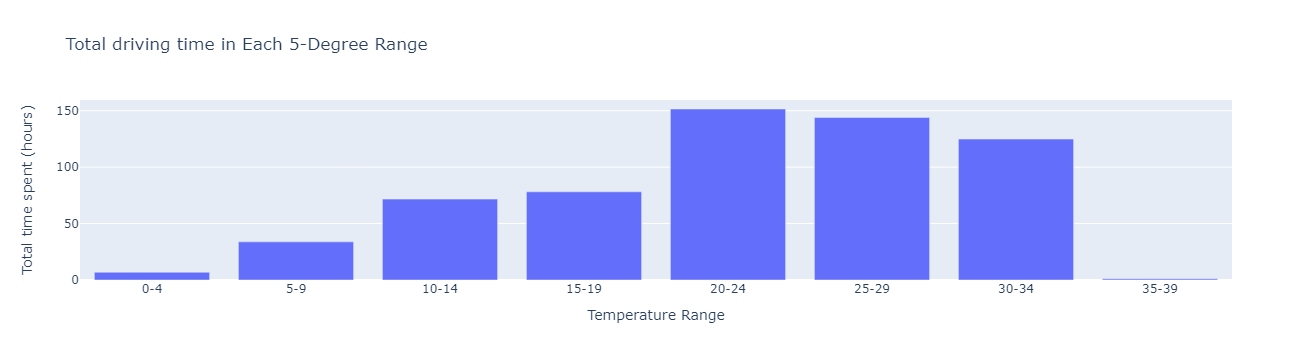

In [63]:
df_sorted['temperature_range_5'] = pd.cut(df_sorted['temp_avg'], bins=bins, labels=labels, right=False)

temp_grouped_5 = df_sorted.groupby('temperature_range_5')['driving_time'].sum().reset_index()
temp_grouped_5['driving_time'] = temp_grouped_5['driving_time']/3600
fig = px.bar(temp_grouped_5, x='temperature_range_5', y='driving_time',
             labels={'temperature_range_5': 'Temperature Range', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 5-Degree Range')
fig.show()

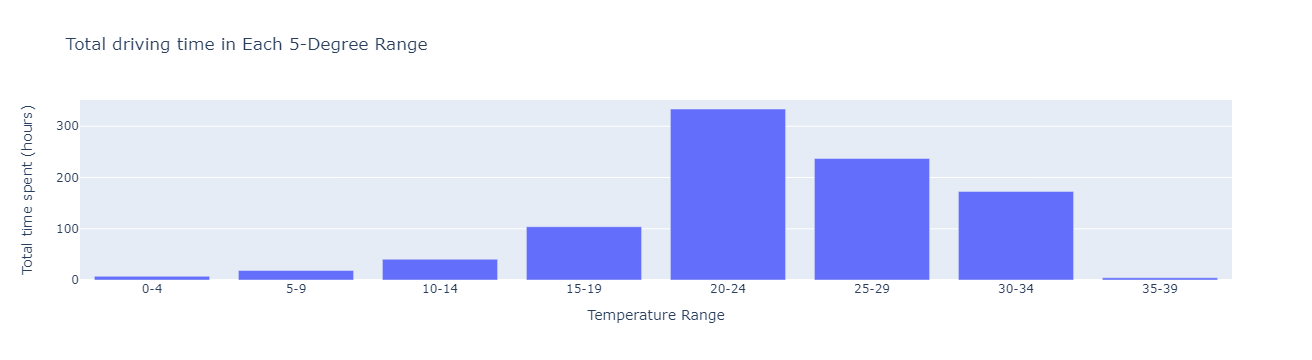

In [102]:
df_671041_sorted
df_671041_sorted['temperature_range_5'] = pd.cut(df_671041_sorted['temp_avg'], bins=bins, labels=labels, right=False)

temp_grouped_5 = df_671041_sorted.groupby('temperature_range_5')['driving_time'].sum().reset_index()
temp_grouped_5['driving_time'] = temp_grouped_5['driving_time']/3600
fig = px.bar(temp_grouped_5, x='temperature_range_5', y='driving_time',
             labels={'temperature_range_5': 'Temperature Range', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 5-Degree Range')
fig.show()

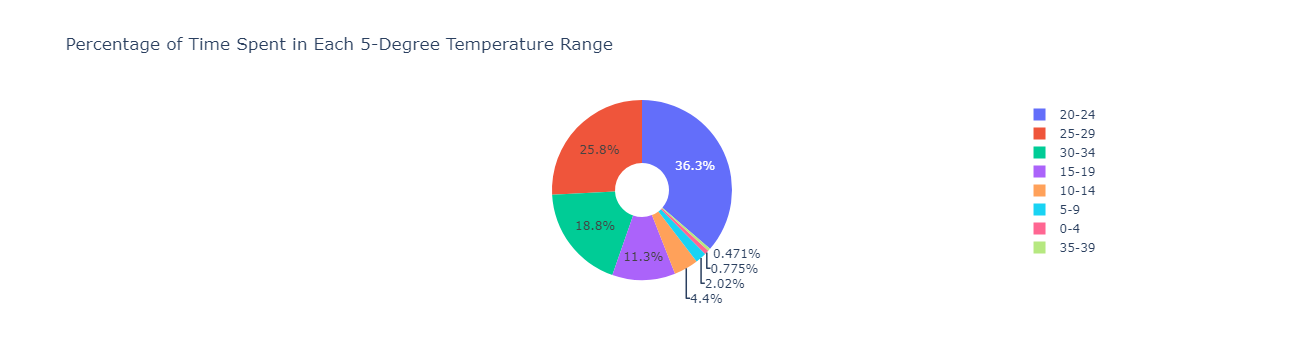

In [104]:
temperature_percentages = df_671041_sorted['driving_time'].groupby(df_671041_sorted['temperature_range_5']).sum() / df_671041_sorted['driving_time'].sum() * 100
# Create the pie chart using Plotly
fig = px.pie(temperature_percentages, values=temperature_percentages.values,
             names=temperature_percentages.index, title='Percentage of Time Spent in Each 5-Degree Temperature Range',hole=0.3)

# Show the pie chart
fig.show()

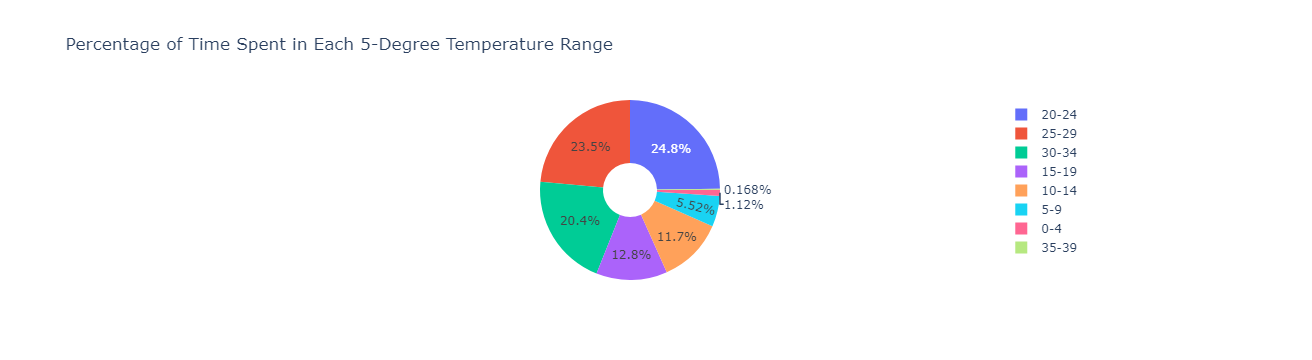

In [31]:
temperature_percentages = df_sorted['driving_time'].groupby(df_sorted['temperature_range_5']).sum() / df_sorted['driving_time'].sum() * 100
# Create the pie chart using Plotly
fig = px.pie(temperature_percentages, values=temperature_percentages.values,
             names=temperature_percentages.index, title='Percentage of Time Spent in Each 5-Degree Temperature Range',hole=0.3)

# Show the pie chart
fig.show()

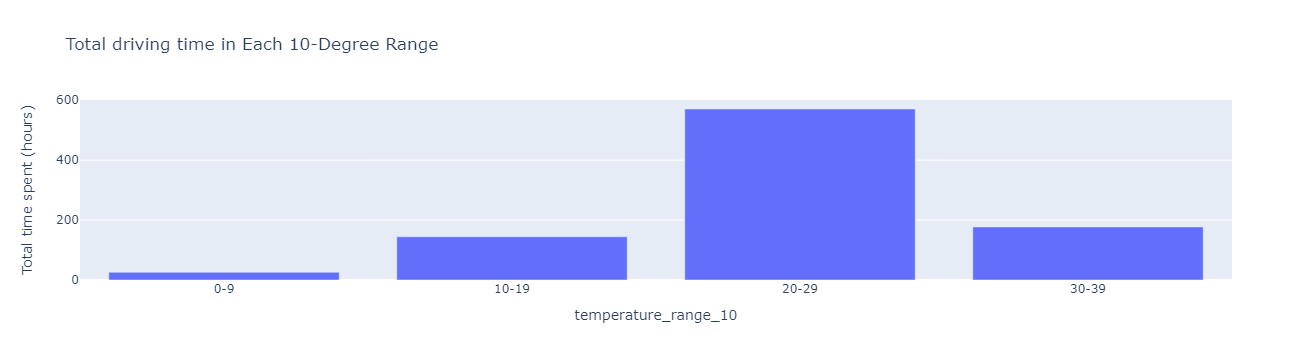

In [106]:
bins = list(range(0, 50, 10))
labels = [f"{x}-{x+9}" for x in bins[:-1]]  # Create labels for the pie chart

df_671041_sorted['temperature_range_10'] = pd.cut(df_671041_sorted['temp_avg'], bins=bins, labels=labels, right=False)

temp_grouped_10 = df_671041_sorted.groupby('temperature_range_10')['driving_time'].sum().reset_index()
temp_grouped_10['driving_time'] = temp_grouped_10['driving_time']/3600
fig = px.bar(temp_grouped_10, x='temperature_range_10', y='driving_time',
             labels={'temperature_range': 'Temperature Range(%)', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 10-Degree Range')
fig.show()

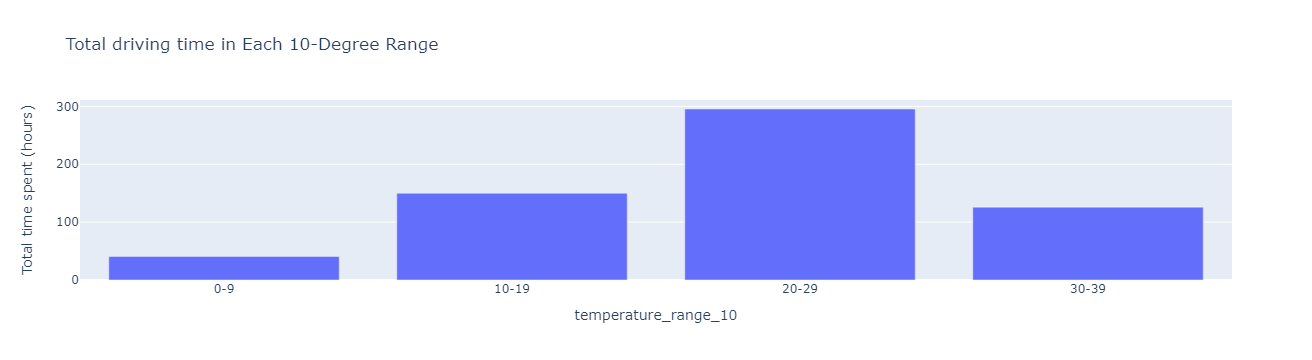

In [32]:
bins = list(range(0, 50, 10))
labels = [f"{x}-{x+9}" for x in bins[:-1]]  # Create labels for the pie chart

df_sorted['temperature_range_10'] = pd.cut(df_sorted['temp_avg'], bins=bins, labels=labels, right=False)

temp_grouped_10 = df_sorted.groupby('temperature_range_10')['driving_time'].sum().reset_index()
temp_grouped_10['driving_time'] = temp_grouped_10['driving_time']/3600
fig = px.bar(temp_grouped_10, x='temperature_range_10', y='driving_time',
             labels={'temperature_range': 'Temperature Range(%)', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 10-Degree Range')
fig.show()

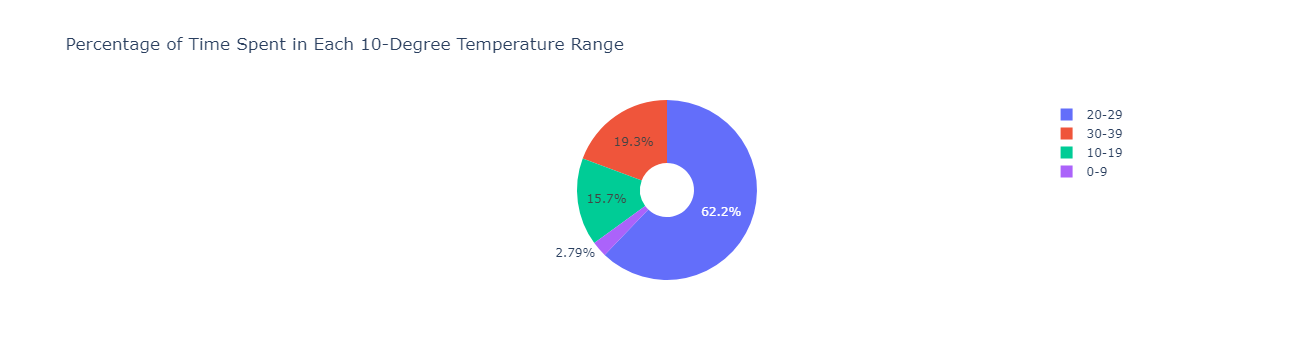

In [109]:
bins = list(range(0, 50, 10))
labels = [f"{x}-{x+9}" for x in bins[:-1]]  # Create labels for the pie chart

df_671041_sorted['temperature_range_10'] = pd.cut(df_671041_sorted['temp_avg'], bins=bins, labels=labels, right=False)

temperature_percentages_10 = df_671041_sorted['driving_time'].groupby(df_671041_sorted['temperature_range_10']).sum() / df_671041_sorted['driving_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(temperature_percentages_10, values=temperature_percentages_10.values,
             names=temperature_percentages_10.index, title='Percentage of Time Spent in Each 10-Degree Temperature Range',hole=0.3)

# Show the pie chart
fig.show()

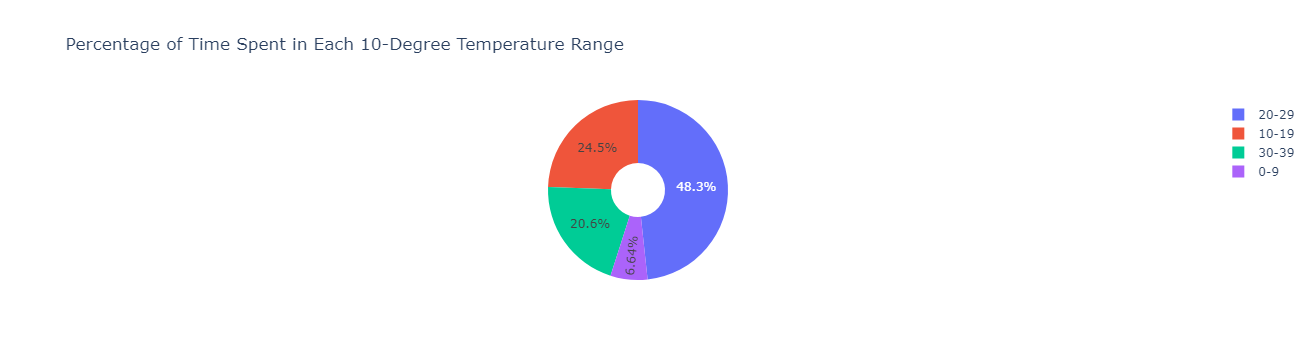

In [33]:
temperature_percentages_10 = df_sorted['driving_time'].groupby(df_sorted['temperature_range_10']).sum() / df_sorted['driving_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(temperature_percentages_10, values=temperature_percentages_10.values,
             names=temperature_percentages_10.index, title='Percentage of Time Spent in Each 10-Degree Temperature Range',hole=0.3)

# Show the pie chart
fig.show()

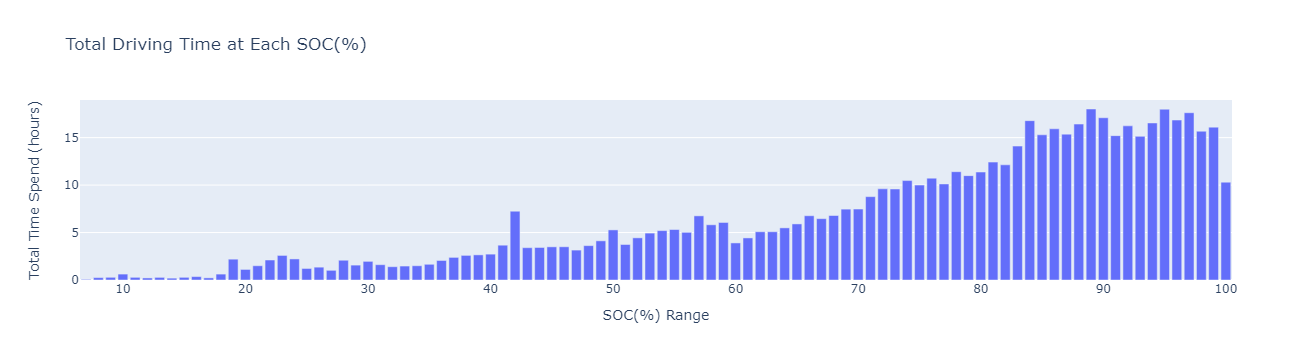

In [34]:
sum_time_per_soc = df_sorted.groupby('SOC(%)')['driving_time'].sum()
sum_time_per_soc = sum_time_per_soc/3600
fig = go.Figure(data=[go.Bar(x=sum_time_per_soc.index, y=sum_time_per_soc.values)])

# Customize the plot layout
fig.update_layout(title='Total Driving Time at Each SOC(%)',
                  xaxis_title='SOC(%) Range',
                  yaxis_title='Total Time Spend (hours)')

# Show the plot
fig.show()

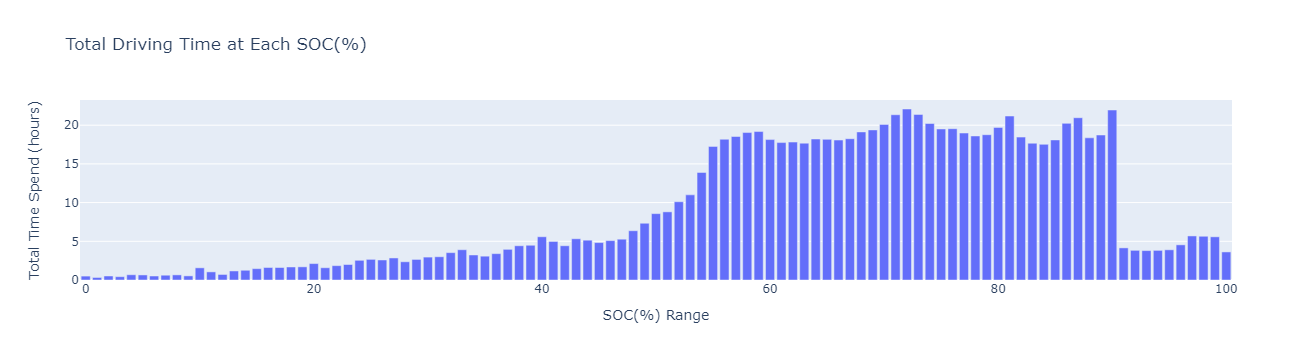

In [110]:
sum_time_per_soc = df_671041_sorted.groupby('SOC(%)')['driving_time'].sum()
sum_time_per_soc = sum_time_per_soc/3600
fig = go.Figure(data=[go.Bar(x=sum_time_per_soc.index, y=sum_time_per_soc.values)])

# Customize the plot layout
fig.update_layout(title='Total Driving Time at Each SOC(%)',
                  xaxis_title='SOC(%) Range',
                  yaxis_title='Total Time Spend (hours)')

# Show the plot
fig.show()

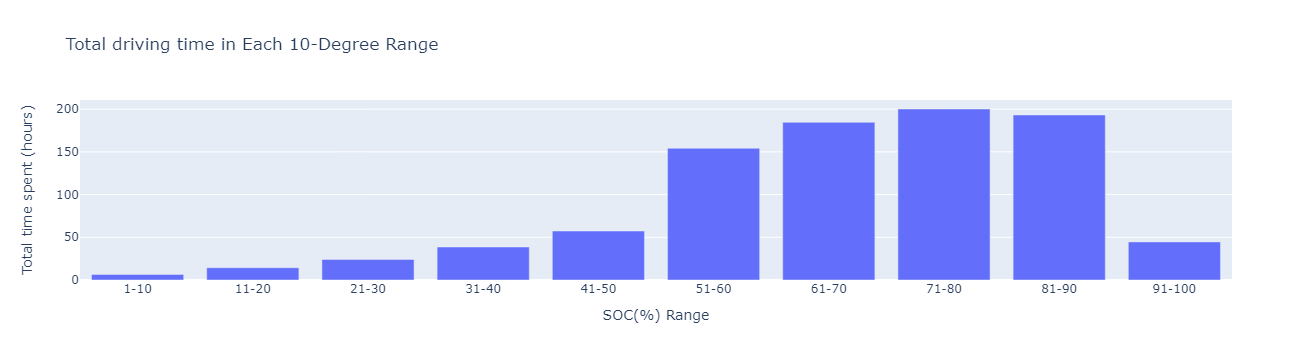

In [111]:
bins = list(range(1, 110, 10))
labels = [f"{x}-{x+9}" for x in bins[:-1]]
df_671041_sorted['soc_range'] = pd.cut(df_671041_sorted['SOC(%)'], bins=bins, labels=labels, right=False)

soc_grouped = df_671041_sorted.groupby('soc_range')['driving_time'].sum().reset_index()
soc_grouped['driving_time'] = soc_grouped['driving_time']/3600
fig = px.bar(soc_grouped, x='soc_range', y='driving_time',
             labels={'soc_range': 'SOC(%) Range', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 10-Degree Range')
fig.show()

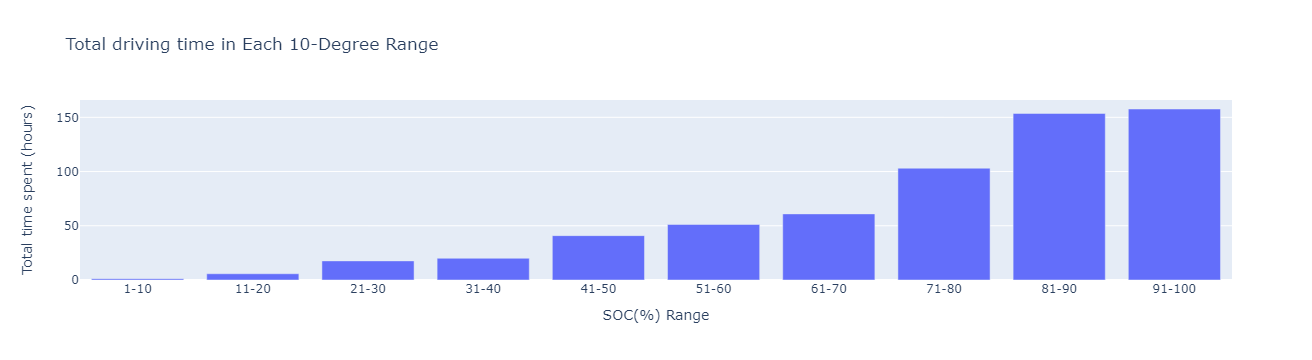

In [35]:
bins = list(range(1, 110, 10))
labels = [f"{x}-{x+9}" for x in bins[:-1]]
df_sorted['soc_range'] = pd.cut(df_sorted['SOC(%)'], bins=bins, labels=labels, right=False)

soc_grouped = df_sorted.groupby('soc_range')['driving_time'].sum().reset_index()
soc_grouped['driving_time'] = soc_grouped['driving_time']/3600
fig = px.bar(soc_grouped, x='soc_range', y='driving_time',
             labels={'soc_range': 'SOC(%) Range', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 10-Degree Range')
fig.show()

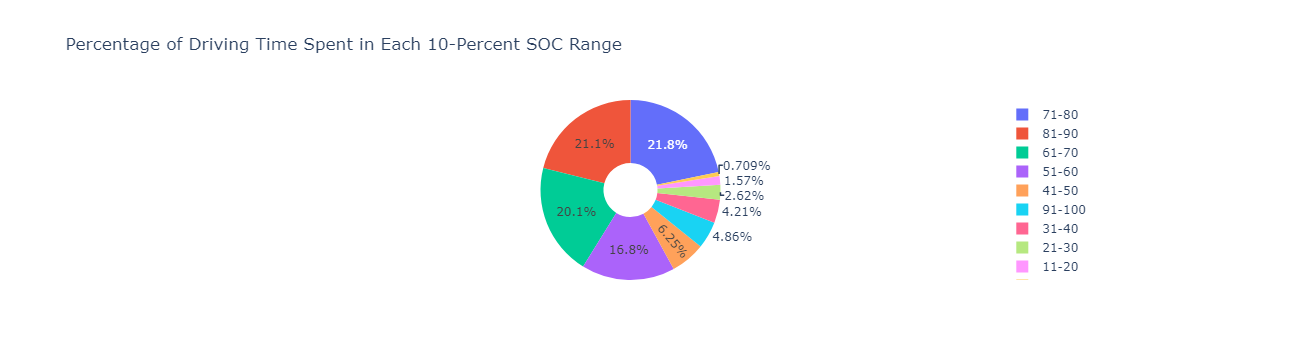

In [113]:
driving_percentages_10 = df_671041_sorted['driving_time'].groupby(df_671041_sorted['soc_range']).sum() / df_671041_sorted['driving_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(driving_percentages_10, values=driving_percentages_10.values,
             names=driving_percentages_10.index, title='Percentage of Driving Time Spent in Each 10-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

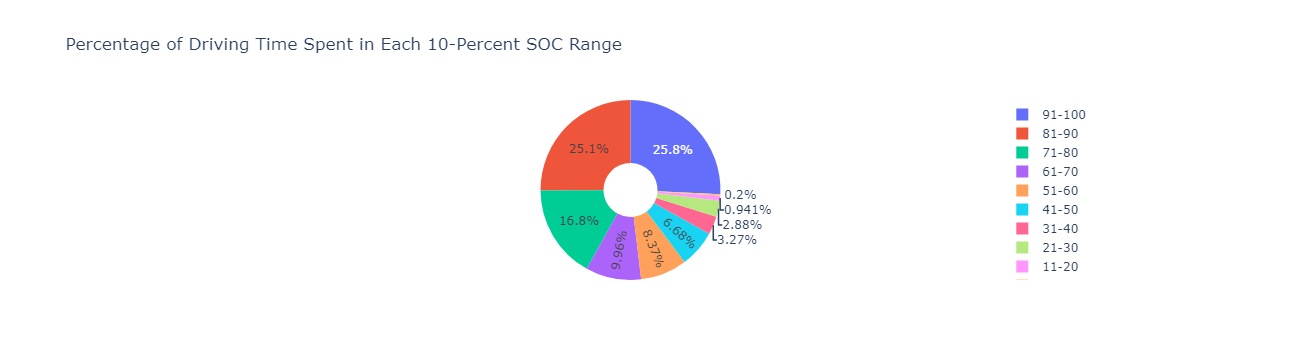

In [36]:
driving_percentages_10 = df_sorted['driving_time'].groupby(df_sorted['soc_range']).sum() / df_sorted['driving_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(driving_percentages_10, values=driving_percentages_10.values,
             names=driving_percentages_10.index, title='Percentage of Driving Time Spent in Each 10-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

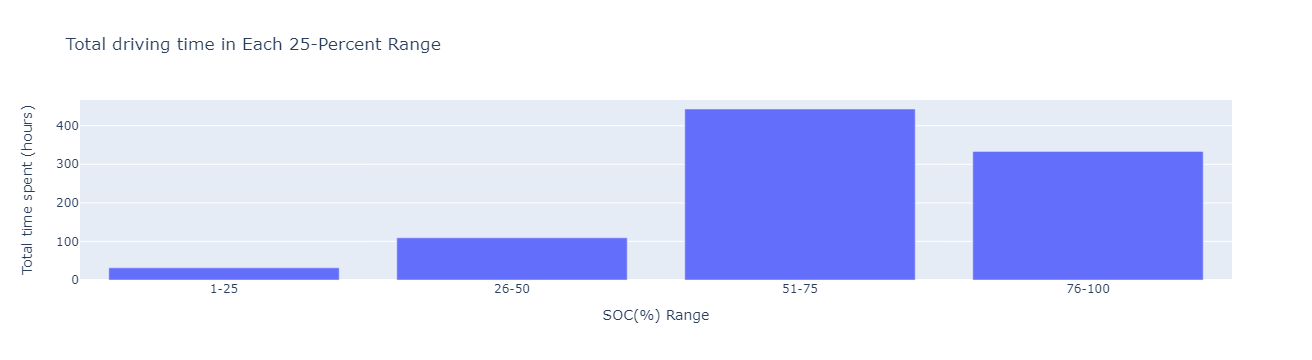

In [114]:
bins = list(range(1, 110, 25))
labels = [f"{x}-{x+24}" for x in bins[:-1]]
df_671041_sorted['soc_range_25'] = pd.cut(df_671041_sorted['SOC(%)'], bins=bins, labels=labels, right=False)

soc_grouped_25 = df_671041_sorted.groupby('soc_range_25')['driving_time'].sum().reset_index()
soc_grouped_25['driving_time'] = soc_grouped_25['driving_time']/3600
fig = px.bar(soc_grouped_25, x='soc_range_25', y='driving_time',
             labels={'soc_range_25': 'SOC(%) Range', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 25-Percent Range')
fig.show()

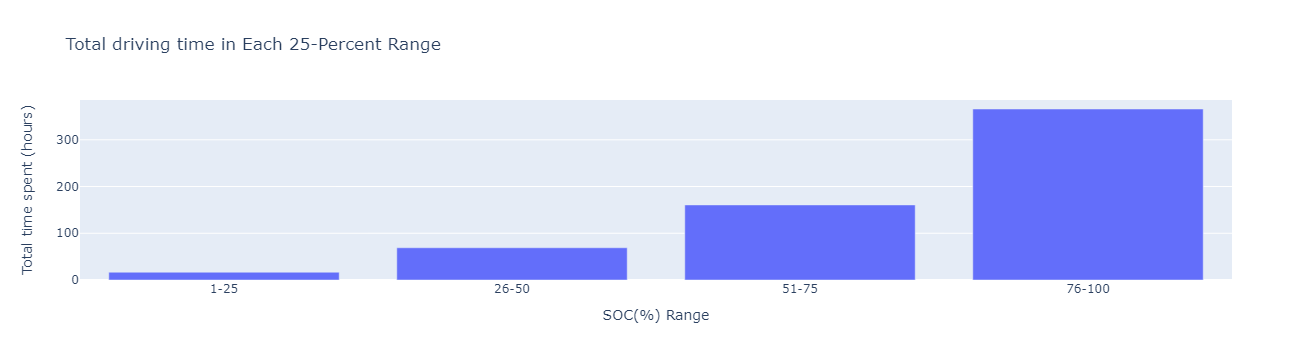

In [37]:
bins = list(range(1, 110, 25))
labels = [f"{x}-{x+24}" for x in bins[:-1]]
df_sorted['soc_range_25'] = pd.cut(df_sorted['SOC(%)'], bins=bins, labels=labels, right=False)

soc_grouped_25 = df_sorted.groupby('soc_range_25')['driving_time'].sum().reset_index()
soc_grouped_25['driving_time'] = soc_grouped_25['driving_time']/3600
fig = px.bar(soc_grouped_25, x='soc_range_25', y='driving_time',
             labels={'soc_range_25': 'SOC(%) Range', 'driving_time': 'Total time spent (hours)'},
             title='Total driving time in Each 25-Percent Range')
fig.show()

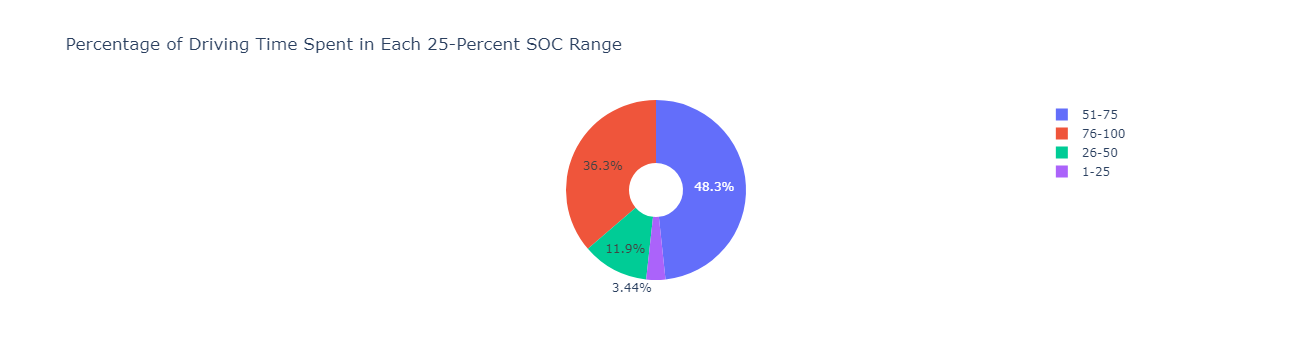

In [115]:
driving_percentages_25 = df_671041_sorted['driving_time'].groupby(df_671041_sorted['soc_range_25']).sum() / df_671041_sorted['driving_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(driving_percentages_25, values=driving_percentages_25.values,
             names=driving_percentages_25.index, title='Percentage of Driving Time Spent in Each 25-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

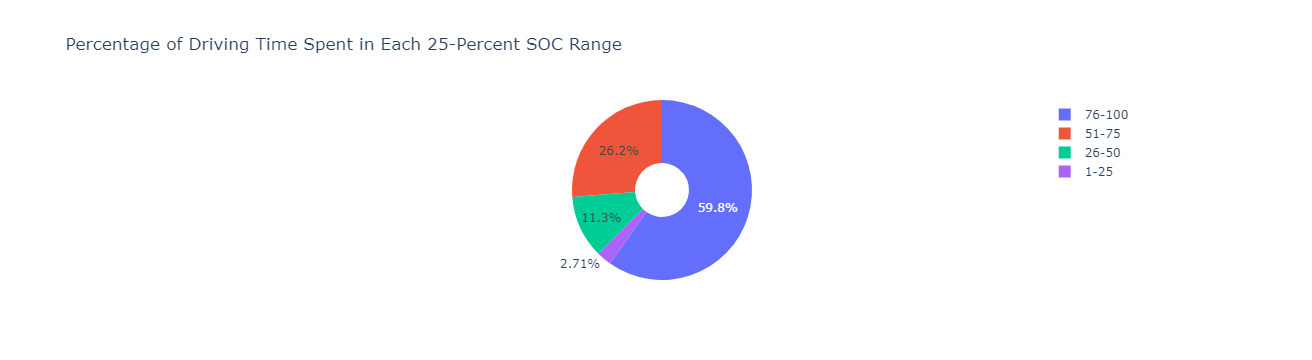

In [38]:
driving_percentages_25 = df_sorted['driving_time'].groupby(df_sorted['soc_range_25']).sum() / df_sorted['driving_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(driving_percentages_25, values=driving_percentages_25.values,
             names=driving_percentages_25.index, title='Percentage of Driving Time Spent in Each 25-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

In [ ]:
sum_time_per_soc = df_sorted.groupby('SOC(%)')['parking_time'].sum()
sum_time_per_soc = sum_time_per_soc/3600
fig = go.Figure(data=[go.Bar(x=sum_time_per_soc.index, y=sum_time_per_soc.values)])

# Customize the plot layout
fig.update_layout(title='Parking Time at Each SOC(%)',
                  xaxis_title='SOC(%)',
                  yaxis_title='Total Time Spend(hours)')

# Show the plot
fig.show()

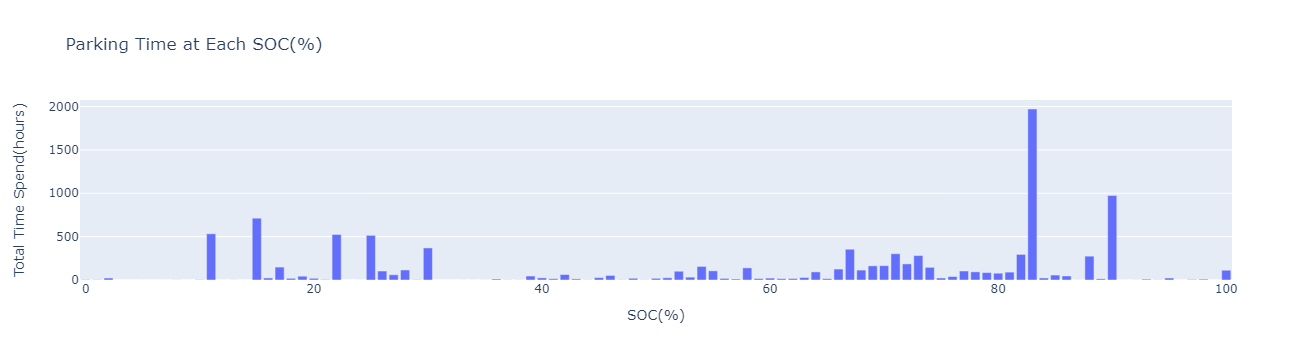

In [116]:
sum_time_per_soc = df_671041_sorted.groupby('SOC(%)')['parking_time'].sum()
sum_time_per_soc = sum_time_per_soc/3600
fig = go.Figure(data=[go.Bar(x=sum_time_per_soc.index, y=sum_time_per_soc.values)])

# Customize the plot layout
fig.update_layout(title='Parking Time at Each SOC(%)',
                  xaxis_title='SOC(%)',
                  yaxis_title='Total Time Spend(hours)')

# Show the plot
fig.show()

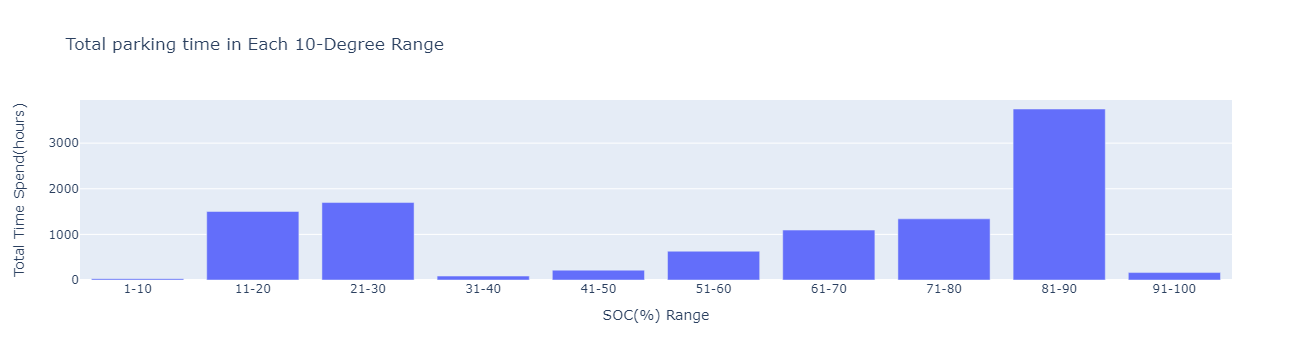

In [117]:
bins = list(range(1, 110, 10))
labels = [f"{x}-{x+9}" for x in bins[:-1]]
df_671041_sorted['soc_range'] = pd.cut(df_671041_sorted['SOC(%)'], bins=bins, labels=labels, right=False)

soc_grouped = df_671041_sorted.groupby('soc_range')['parking_time'].sum().reset_index()
soc_grouped['parking_time'] = soc_grouped['parking_time']/3600
fig = px.bar(soc_grouped, x='soc_range', y='parking_time',
             labels={'soc_range': 'SOC(%) Range', 'parking_time': 'Total Time Spend(hours)'},
             title='Total parking time in Each 10-Degree Range')
fig.show()

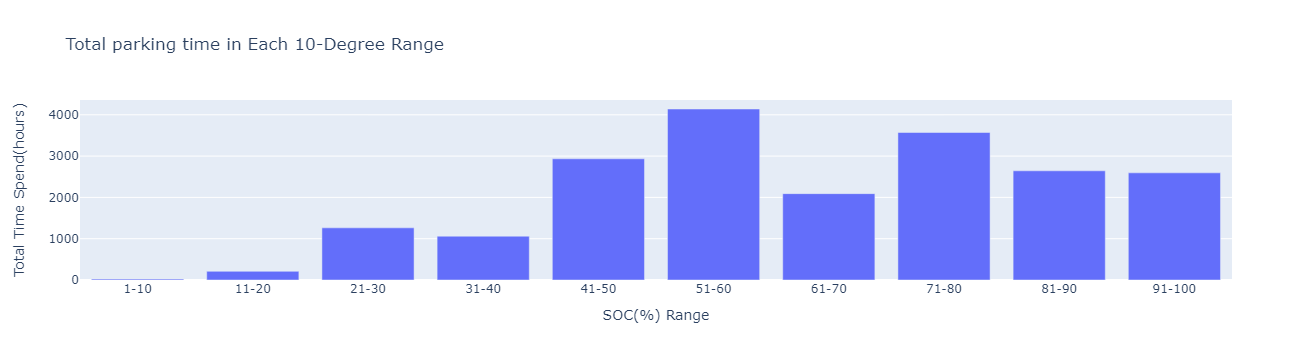

In [40]:
bins = list(range(1, 110, 10))
labels = [f"{x}-{x+9}" for x in bins[:-1]]
df_sorted['soc_range'] = pd.cut(df_sorted['SOC(%)'], bins=bins, labels=labels, right=False)

soc_grouped = df_sorted.groupby('soc_range')['parking_time'].sum().reset_index()
soc_grouped['parking_time'] = soc_grouped['parking_time']/3600
fig = px.bar(soc_grouped, x='soc_range', y='parking_time',
             labels={'soc_range': 'SOC(%) Range', 'parking_time': 'Total Time Spend(hours)'},
             title='Total parking time in Each 10-Degree Range')
fig.show()

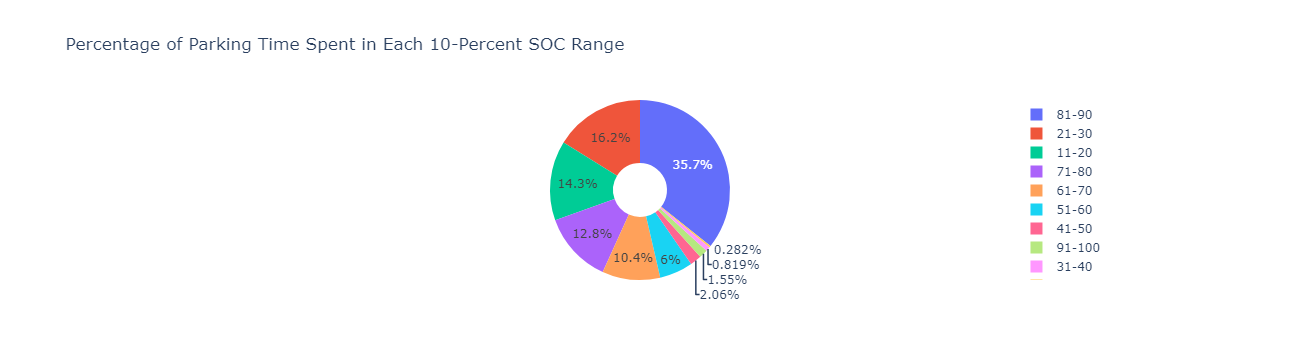

In [118]:
parking_percentages_10 = df_671041_sorted['parking_time'].groupby(df_671041_sorted['soc_range']).sum() / df_671041_sorted['parking_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(parking_percentages_10, values=parking_percentages_10.values,
             names=parking_percentages_10.index, title='Percentage of Parking Time Spent in Each 10-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

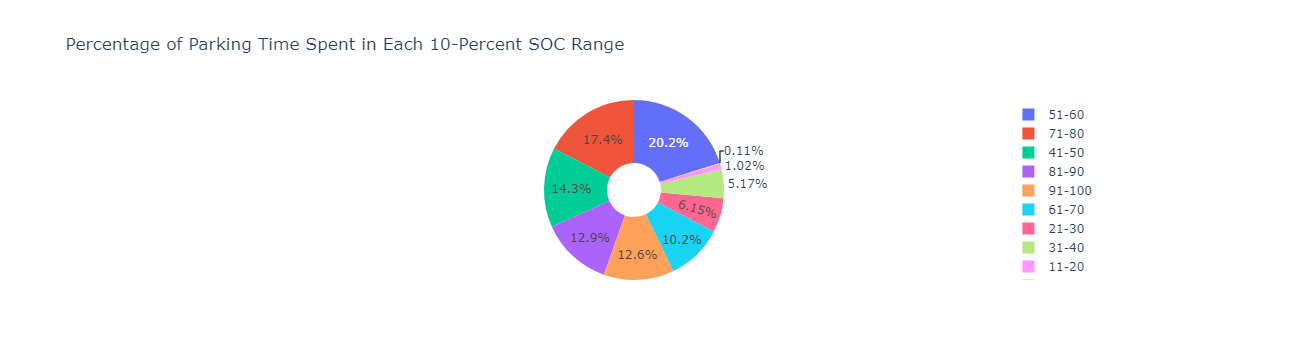

In [41]:
parking_percentages_10 = df_sorted['parking_time'].groupby(df_sorted['soc_range']).sum() / df_sorted['parking_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(parking_percentages_10, values=parking_percentages_10.values,
             names=parking_percentages_10.index, title='Percentage of Parking Time Spent in Each 10-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

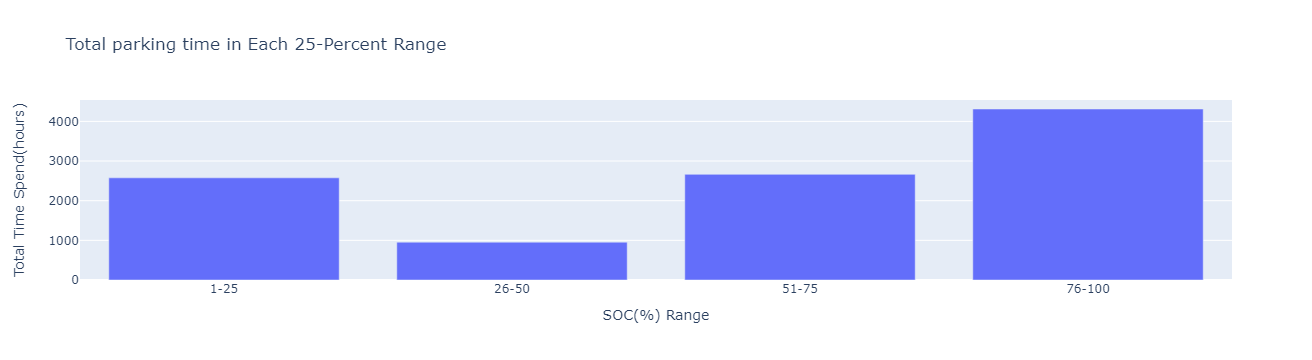

In [119]:
soc_grouped_25 = df_671041_sorted.groupby('soc_range_25')['parking_time'].sum().reset_index()
soc_grouped_25['parking_time'] = soc_grouped_25['parking_time']/3600
fig = px.bar(soc_grouped_25, x='soc_range_25', y='parking_time',
             labels={'soc_range_25': 'SOC(%) Range', 'parking_time': 'Total Time Spend(hours)'},
             title='Total parking time in Each 25-Percent Range')
fig.show()

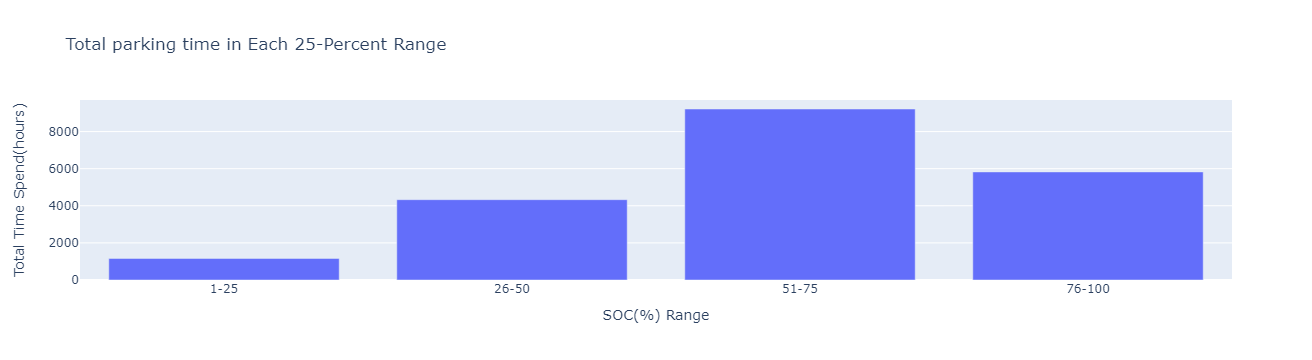

In [42]:
soc_grouped_25 = df_sorted.groupby('soc_range_25')['parking_time'].sum().reset_index()
soc_grouped_25['parking_time'] = soc_grouped_25['parking_time']/3600
fig = px.bar(soc_grouped_25, x='soc_range_25', y='parking_time',
             labels={'soc_range_25': 'SOC(%) Range', 'parking_time': 'Total Time Spend(hours)'},
             title='Total parking time in Each 25-Percent Range')
fig.show()

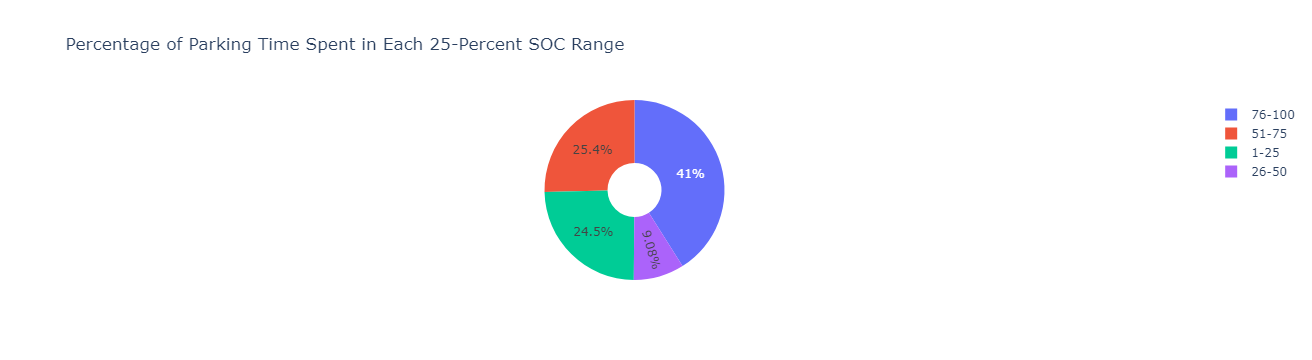

In [120]:
parking_percentages_25 = df_671041_sorted['parking_time'].groupby(df_671041_sorted['soc_range_25']).sum() / df_671041_sorted['parking_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(parking_percentages_25, values=parking_percentages_25.values,
             names=parking_percentages_25.index, title='Percentage of Parking Time Spent in Each 25-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

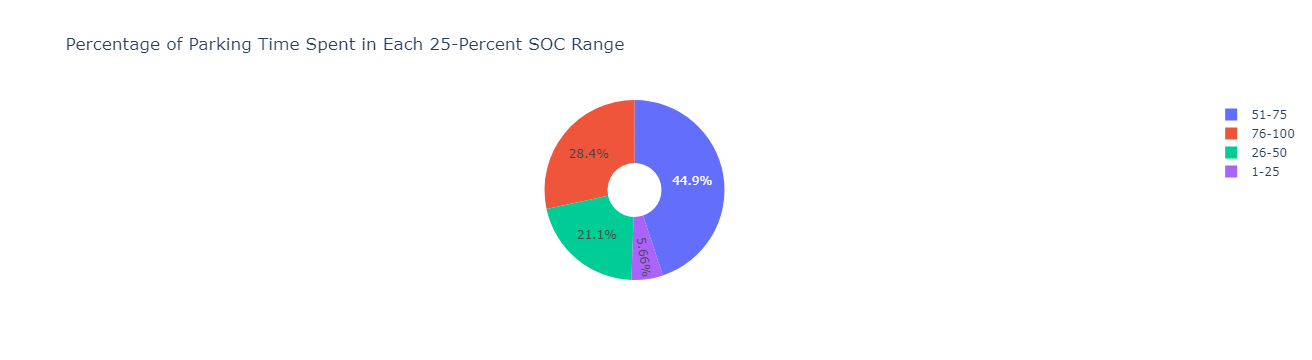

In [43]:
parking_percentages_25 = df_sorted['parking_time'].groupby(df_sorted['soc_range_25']).sum() / df_sorted['parking_time'].sum() * 100

# Create the pie chart using Plotly
fig = px.pie(parking_percentages_25, values=parking_percentages_25.values,
             names=parking_percentages_25.index, title='Percentage of Parking Time Spent in Each 25-Percent SOC Range',hole=0.3)

# Show the pie chart
fig.show()

In [44]:
df_sorted['power'] = df_sorted['total_current']*df_sorted['total_voltage']

In [121]:
df_671041_sorted['power'] = df_671041_sorted['total_current']*df_671041_sorted['total_voltage']

In [45]:
df_sorted['power'].describe()

count    230059.000000
mean       -409.596163
std       12483.791139
min      -98860.440000
25%       -3916.880000
50%         390.400000
75%        1739.200000
max      310434.000000
Name: power, dtype: float64

In [46]:
df_sorted['energy'] = df_sorted.apply(lambda row: 0 if row['power'] < 0 else row['power'] * row['driving_time'], axis=1)

In [122]:
df_671041_sorted['energy'] = df_671041_sorted.apply(lambda row: 0 if row['power'] < 0 else row['power'] * row['driving_time'], axis=1)

In [48]:
soc_grouped_energy = df_sorted.groupby('soc_range')['energy'].sum().reset_index()
soc_grouped_energy

,soc_range,energy
0,1-10,1.225389e+07
1,11-20,5.510123e+07
2,21-30,1.657837e+08
3,31-40,2.494717e+08
4,41-50,4.239869e+08
5,51-60,5.888341e+08
6,61-70,7.514477e+08
7,71-80,1.240836e+09
8,81-90,1.718074e+09
9,91-100,1.413318e+09


In [129]:
soc_grouped_energy = df_671041_sorted.groupby('soc_range')['energy'].sum().reset_index()


In [130]:
soc_grouped_energy['energy'] = soc_grouped_energy['energy']/3600000

In [131]:
soc_grouped_energy

,soc_range,energy
0,1-10,35.149325
1,11-20,77.927774
2,21-30,135.396048
3,31-40,218.416847
4,41-50,331.836387
5,51-60,794.884266
6,61-70,940.654125
7,71-80,1018.514347
8,81-90,855.475838
9,91-100,142.990577


In [49]:
soc_grouped_energy['energy'] = soc_grouped_energy['energy']/3600000
soc_grouped_energy

,soc_range,energy
0,1-10,3.403859
1,11-20,15.305897
2,21-30,46.051040
3,31-40,69.297689
4,41-50,117.774129
5,51-60,163.565015
6,61-70,208.735470
7,71-80,344.676629
8,81-90,477.242758
9,91-100,392.588296


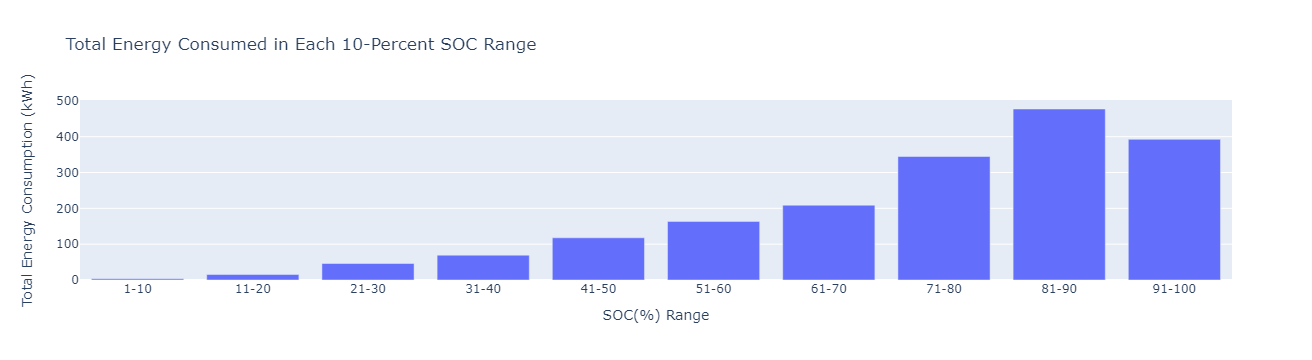

In [50]:
fig = px.bar(soc_grouped_energy, x='soc_range', y='energy',
             labels={'soc_range': 'SOC(%) Range', 'energy': 'Total Energy Consumption (kWh)'},
             title='Total Energy Consumed in Each 10-Percent SOC Range')
fig.show()

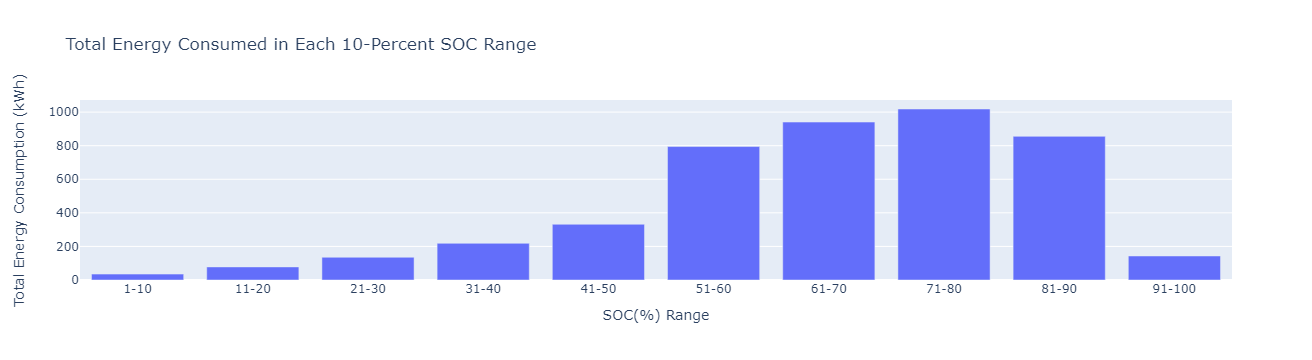

In [132]:
fig = px.bar(soc_grouped_energy, x='soc_range', y='energy',
             labels={'soc_range': 'SOC(%) Range', 'energy': 'Total Energy Consumption (kWh)'},
             title='Total Energy Consumed in Each 10-Percent SOC Range')
fig.show()

In [51]:
df_sorted['total_milage'].min()

0.0

In [52]:
df_sorted['total_milage'].max()

6242.0

In [53]:
max_mileage_index = df_sorted['total_milage'].idxmax()
max_mileage_time = df_sorted.loc[max_mileage_index, 'send_time']

In [54]:
max_mileage_time

Timestamp('2023-02-16 18:05:43')

In [55]:
df_sorted['send_time'].min(), df_sorted['send_time'].max()

(Timestamp('2020-09-18 16:45:27'), Timestamp('2023-02-16 18:10:23'))

In [48]:
db = pymysql.connect(
    host="10.64.66.27",
    port=9030,
    user='root',    #在这里输入用户名
    password='Volvo2022',     #在这里输入密码
    )

cursor = db.cursor()

In [50]:
cursor.execute(f'SELECT sending_time,accumulated_mileage,battery_pack_temperature,vehicle_state,soc,total_current,total_voltage FROM rms_db.rms_all_120_codev where vin="LYVXEEDE4ML448652"' )
df_448652=pd.DataFrame(cursor.fetchall())

In [52]:
df_448652[0].min(),df_448652[0].max()

(Timestamp('2020-09-18 16:55:28'), Timestamp('2021-02-22 10:17:43'))

In [53]:
df_448652[1].min(),df_448652[1].max()

(0.0, 318.0)

In [54]:
cursor.close()

In [55]:
db.close()

In [56]:
bins = [0, 36, 60, 180, float('inf')]
labels = ['0-36','36-60','60-180','more than 180']
df_sorted['current_bins'] = pd.cut(df_sorted['total_current'],bins = bins, labels=labels)


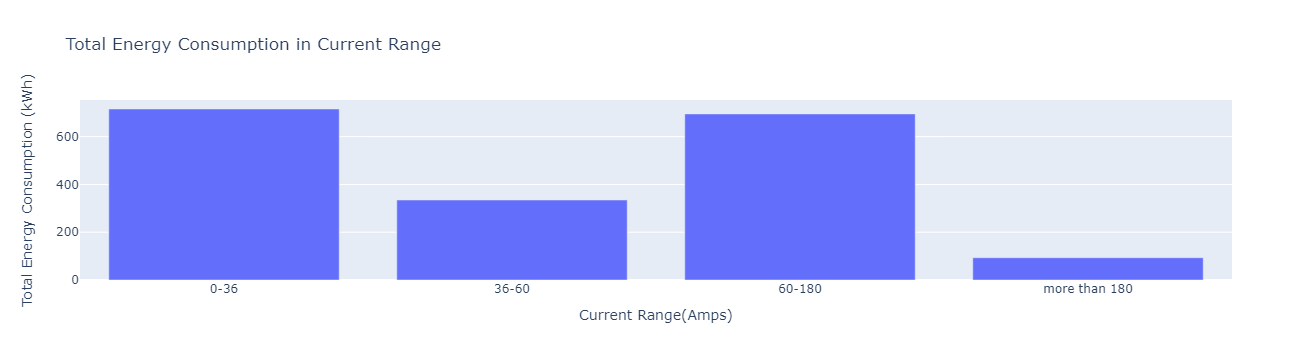

In [64]:
current_grouped = df_sorted.groupby('current_bins')['energy'].sum().reset_index()
current_grouped['energy'] = current_grouped['energy']/3600000
fig = px.bar(current_grouped, x='current_bins', y='energy',
             labels={'current_bins': 'Current Range(Amps)', 'energy': 'Total Energy Consumption (kWh)'},
             title='Total Energy Consumption in Current Range')
fig.show()